In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the csv /content/MBTI 500.csv and /content/mbti_1.csv

import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/MBIT_data/MBTI 500.csv')
df2 = pd.read_csv('/content/drive/MyDrive/MBIT_data/mbti_1.csv')

In [ ]:
df1.describe()

,posts,type
count,106067,106067
unique,106067,16
top,know intj tool use interaction people excuse a...,INTP
freq,1,24961


In [ ]:
df2.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Initialize the Porter Stemmer
port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Optimized stemming function
def stemming(content):
    # Remove non-alphabetical characters and convert to lower case
    content = re.sub('[^a-zA-Z]', ' ', content).lower()
    # Tokenize and remove stopwords
    words = [port_stem.stem(word) for word in content.split() if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

### testing

In [ ]:
# Get the first 5 values from the 'posts' column
first_5_values = df2['posts'].head(80)

# Apply the stemming function to the first 5 values
stemmed_values = first_5_values.apply(stemming)

# Print the original and stemmed values
for i, (original, stemmed) in enumerate(zip(first_5_values, stemmed_values), 1):
    print(f"Original {i}: {original}")
    print(f"Stemmed {i}: {stemmed}\n")


Original 1: 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-des

In [ ]:
# Function to process a chunk
def process_chunk(chunk):
    chunk['posts'] = chunk['posts'].apply(stemming)
    return chunk

In [ ]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor
# Split the DataFrame into 20 chunks
num_chunks = 20
chunks = np.array_split(df2, num_chunks)

# Use ThreadPoolExecutor to process chunks in parallel
with ThreadPoolExecutor(max_workers=num_chunks) as executor:
    results = list(executor.map(process_chunk, chunks))

# Combine the results back into a single DataFrame
df2_stemmed = pd.concat(results)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2_stemmed['posts'])

# X is now the term-document matrix


In [ ]:
for i, (original, stemmed) in enumerate(zip(df2['posts'].head(), df2_stemmed['posts'].head()), 1):
    print(f"Original {i}: {original}")
    print(f"Stemmed {i}: {stemmed}\n")

Original 1: 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-des

In [ ]:
print(X)

  (0, 58028)	0.013944153229010393
  (0, 80919)	0.012075009271626774
  (0, 4281)	0.025679144613310244
  (0, 19131)	0.057085983294504705
  (0, 31373)	0.07193075269668397
  (0, 36278)	0.07767349341266644
  (0, 93827)	0.009499536269597618
  (0, 15443)	0.03160311513420065
  (0, 53196)	0.021981333702860702
  (0, 62663)	0.0445483064334781
  (0, 26743)	0.03578237783035592
  (0, 8062)	0.016930062211498755
  (0, 66579)	0.020639600474512472
  (0, 7757)	0.012887622479014984
  (0, 79673)	0.017888970564629663
  (0, 1683)	0.01698173329560442
  (0, 98439)	0.011380690915382956
  (0, 79977)	0.017904203191741117
  (0, 68065)	0.02597266106408141
  (0, 26729)	0.024905810126000443
  (0, 18369)	0.07767349341266644
  (0, 1601)	0.019720996536919524
  (0, 35571)	0.02053840808919488
  (0, 56318)	0.016949061454833637
  (0, 75470)	0.015081312633370429
  :	:
  (8674, 52348)	0.03397426881136166
  (8674, 78051)	0.02872915262879384
  (8674, 52737)	0.01479184875215767
  (8674, 48024)	0.02036595221866505
  (8674, 87071)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer


# Define the path to your Google Drive
drive_path = '/content/drive/MyDrive/MBIT_data/'

# Save the vectorized matrix X
with open(drive_path + 'vectorized_matrix.pkl', 'wb') as file:
    pickle.dump(X, file)

# Save the vectorizer
with open(drive_path + 'vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("Vectorized matrix and vectorizer saved successfully to Google Drive.")


Vectorized matrix and vectorizer saved successfully to Google Drive.


# Start from here

In [ ]:
import pickle

# Define the path to your Google Drive
drive_path = '/content/drive/MyDrive/MBIT_data/'

# Load the vectorized matrix X
with open(drive_path + 'vectorized_matrix.pkl', 'rb') as file:
    X = pickle.load(file)

# Load the vectorizer
with open(drive_path + 'vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

print("Vectorized matrix and vectorizer loaded successfully from Google Drive.")


Vectorized matrix and vectorizer loaded successfully from Google Drive.


In [ ]:
import pandas as pd

# Assume df2 is already defined and has a 'type' column
y = df2['type']

# Perform one-hot encoding
y_onehot = pd.get_dummies(y, prefix='type')

# Print the first few rows to verify the one-hot encoding
print(y_onehot.head())


   type_ENFJ  type_ENFP  type_ENTJ  type_ENTP  type_ESFJ  type_ESFP  \
0      False      False      False      False      False      False   
1      False      False      False       True      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False       True      False      False      False   

   type_ESTJ  type_ESTP  type_INFJ  type_INFP  type_INTJ  type_INTP  \
0      False      False       True      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False       True   
3      False      False      False      False       True      False   
4      False      False      False      False      False      False   

   type_ISFJ  type_ISFP  type_ISTJ  type_ISTP  
0      False      False      False      False  
1      False      False      False      False  
2 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
import pickle

# cell below is not needed to be executed, only for safety

In [ ]:

# If not, load them from Google Drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/your_directory/'

# Load the vectorized matrix X
with open(drive_path + 'vectorized_matrix.pkl', 'rb') as file:
    X = pickle.load(file)

# Load the one-hot encoded y
with open(drive_path + 'y_onehot.pkl', 'rb') as file:
    y_onehot = pickle.load(file)

# Ensure y_onehot is in the right format for classification
y = y_onehot.idxmax(axis=1)  # Convert one-hot encoding back to single column of labels


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize classifiers
softmax_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
# Train and evaluate Softmax classifier
softmax_classifier.fit(X_train, y_train)
y_pred_softmax = softmax_classifier.predict(X_test)
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
print(f"Softmax Classifier Accuracy: {accuracy_softmax:.4f}")

Softmax Classifier Accuracy: 0.6513


In [ ]:
# Train and evaluate Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)
y_pred_tree = decision_tree_classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Classifier Accuracy: {accuracy_tree:.4f}")

Decision Tree Classifier Accuracy: 0.5118


In [ ]:
# Train and evaluate Random Forest classifier
random_forest_classifier.fit(X_train, y_train)
y_pred_forest = random_forest_classifier.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Classifier Accuracy: {accuracy_forest:.4f}")

Random Forest Classifier Accuracy: 0.0006


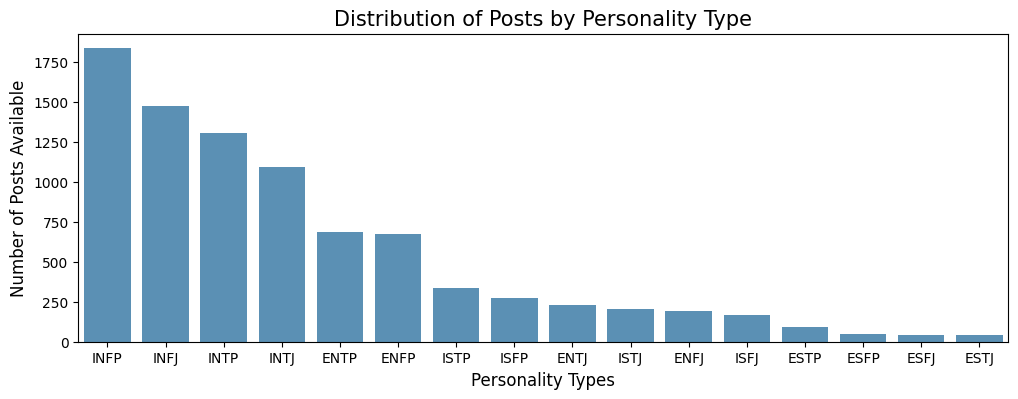

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each type
cnt_srs = df2['type'].value_counts()

# Set the size of the plot
plt.figure(figsize=(12, 4))

# Create the bar plot
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)

# Set the labels of the plot
plt.xlabel('Personality Types', fontsize=12)
plt.ylabel('Number of Posts Available', fontsize=12)
plt.title('Distribution of Posts by Personality Type', fontsize=15)

# Show the plot
plt.show()


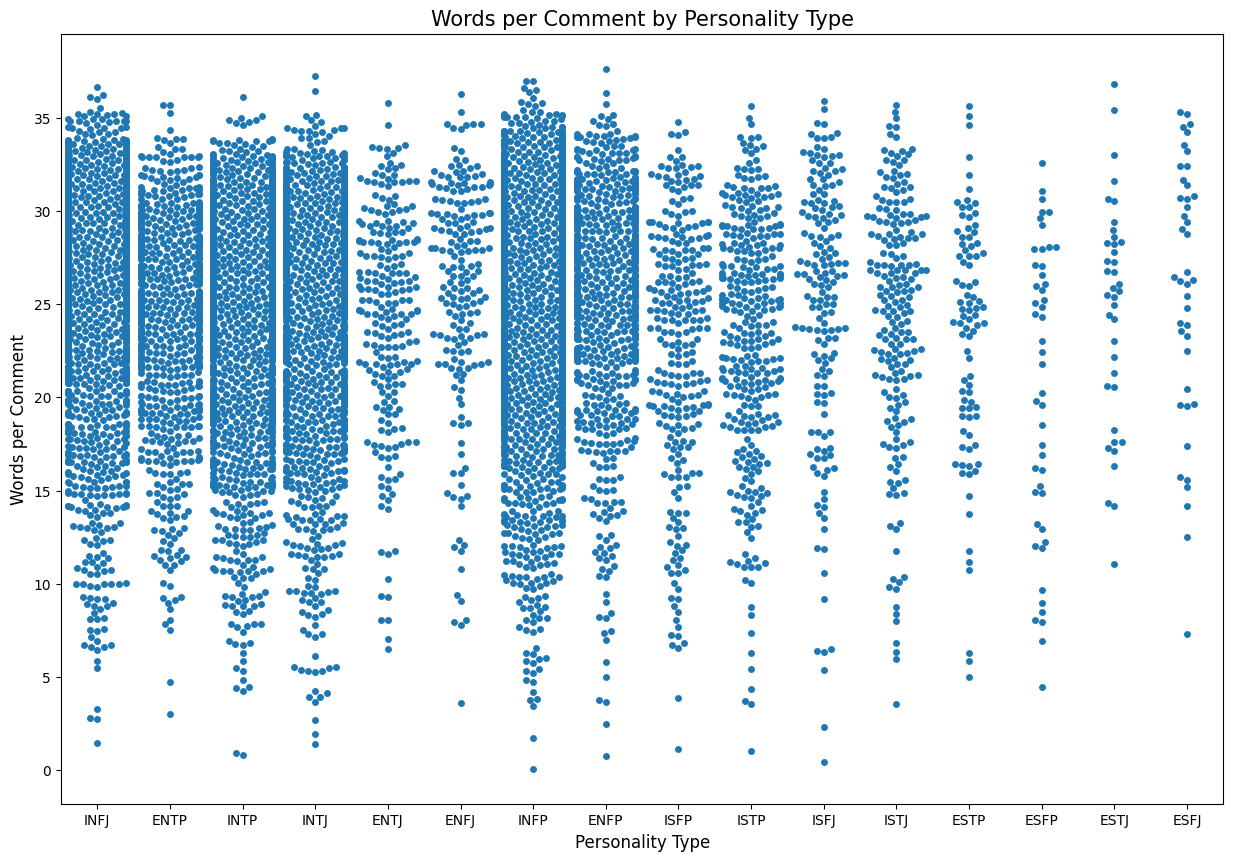

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

# Make a copy of the DataFrame
df = df2.copy()

# This function counts the number of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

# This function counts the number of words per post out of the total 50 posts in the whole row
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split()) / 50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

# Plotting the swarm plot
plt.figure(figsize=(15, 10))
sns.swarmplot(x="type", y="words_per_comment", data=df)
plt.xlabel('Personality Type', fontsize=12)
plt.ylabel('Words per Comment', fontsize=12)
plt.title('Words per Comment by Personality Type', fontsize=15)
plt.show()


In [ ]:
def preprocess_text(df, remove_special=True):
    texts = df['posts'].copy()
    labels = df['type'].copy()

    #Remove links
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

    #Keep the End Of Sentence characters
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))

    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))
     #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert posts to lowercase
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))

    #Remove very short or long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove MBTI Personality Words - crutial in order to get valid model accuracy estimation for unseen data.
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    return df

#Preprocessing of entered Text
new_df = preprocess_text(df2)

In [ ]:
#Remove posts with less than X words
min_words = 15
print("Before : Number of posts", len(new_df))
new_df["no. of. words"] = new_df["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
new_df = new_df[new_df["no. of. words"] >= min_words]

print("After : Number of posts", len(new_df))

Before : Number of posts 8675
After : Number of posts 8466


In [ ]:
from sklearn.preprocessing import LabelEncoder
new_df = df2.copy()

# Initialize the LabelEncoder
enc = LabelEncoder()

# Fit and transform the 'type' column and add it as a new column
new_df['type_encoding'] = enc.fit_transform(new_df['type'])

# Create the target variable
target = new_df['type_encoding']

# Display the first few rows to verify the encoding
print(new_df[['type', 'type_encoding']].head())


   type  type_encoding
0  INFJ              8
1  ENTP              3
2  INTP             11
3  INTJ             10
4  ENTJ              2


In [ ]:
new_df.head(15)

,type,posts,no. of. words,type_encoding
0,INFJ,enfp intj moments sportscenter plays...,430,8
1,ENTP,finding lack these posts very alarming eo...,803,3
2,INTP,good course which know thats bles...,253,11
3,INTJ,dear intp enjoyed conversation other eos...,777,10
4,ENTJ,youre fired eostokendot thats another silly...,402,2
5,INTJ,eostokendot science perfect eostokendo...,245,10
6,INFJ,cant draw nails haha eostokendot those w...,970,8
7,INTJ,tend build collection things desktop th...,140,10
8,INFJ,sure thats good question eostokendot dist...,522,8
9,INTP,this position where have actually pe...,130,11


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizing the posts for the model and filtering Stop-words
vect = CountVectorizer(stop_words='english')

# Converting posts (or training or X feature) into numerical form by count vectorization
train =  vect.fit_transform(new_df["posts"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5205, 98580) (5205,) (3470, 98580) (3470,)
